# **Tugas Besar 1 Pembelajaran Mesin**
Ni Made Dwipadini Puspitarini

1301194141

IF-43-09

# **Import Dataset**

In [ ]:
# connecting to google drive
!gdown --id 1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7

Downloading...
From: https://drive.google.com/uc?id=1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 130MB/s]


# **Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Eksplorasi dan Persiapan Data**

**Reading and Understanding Data**

In [ ]:
# membaca dataset dan menampilkan 5 data pertama
df = pd.read_csv("kendaraan_train.csv")
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# mengecek ukuran baris dan kolom
df.shape

(285831, 12)

In [ ]:
# mengecek nama-nama kolom, tipe data masing-masing kolom, beserta kelengkapan datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
# melihat summary statistik dari dataframe
df.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Data Preprocessing**

In [ ]:
# rename beberapa nama kolom 
df = df.rename(columns={'Jenis_Kelamin' : 'Jenis Kelamin', 'Kode_Daerah' : 'Kode Daerah', 
                        'Sudah_Asuransi' : 'Sudah Asuransi', 'Umur_Kendaraan' : 'Umur Kendaraan', 
                        'Kendaraan_Rusak' : 'Kendaraan Rusak', 'Kanal_Penjualan' : 'Kanal Penjualan', 
                        'Lama_Berlangganan' : 'Lama Berlangganan'})

In [ ]:
# drop kolom id dan tertarik
df = df.drop(['id', 'Tertarik'], axis = 1)

In [ ]:
# mengecek jumlah missing value pada masing-masing kolom
df.isnull().sum()

Jenis Kelamin        14440
Umur                 14214
SIM                  14404
Kode Daerah          14306
Sudah Asuransi       14229
Umur Kendaraan       14275
Kendaraan Rusak      14188
Premi                14569
Kanal Penjualan      14299
Lama Berlangganan    13992
dtype: int64

**Handling Missing Values**

In [ ]:
# mencari nilai modus untuk kolom Kode Daerah, Umur Kendaraan, Kendaraan Rusak, dan Kanal Penjualan
df.iloc[:,[3, 5, 6, 8]].mode()

,Kode Daerah,Umur Kendaraan,Kendaraan Rusak,Kanal Penjualan
0,28.0,1-2 Tahun,Pernah,152.0


In [ ]:
# mengganti nilai null pada kolom df['Jenis Kelamin'] dengan nilai tetangga sebelumnya
df['Jenis Kelamin'].fillna(method = 'ffill', inplace = True)

# mengganti nilai null pada kolom df['Sudah Asuransi'] dengan nilai tetangga sebelumnya
df['Sudah Asuransi'].fillna(method = 'ffill', inplace = True)

# mengganti nilai null pada kolom df['Umur'] dengan nilai rata-ratanya 
df['Umur'].fillna(df['Umur'].mean(), inplace = True)

# mengganti nilai null pada kolom df['Premi'] dengan nilai rata-ratanya 
df['Premi'].fillna(df['Premi'].mean(), inplace = True)

# mengganti nilai null pada kolom df['Lama Berlangganan'] dengan nilai rata-ratanya 
df['Lama Berlangganan'].fillna(df['Lama Berlangganan'].mean(), inplace = True)

# mengganti nilai null pada kolom df['SIM'] dengan 1
df['SIM'].fillna(1, inplace = True)

# mengganti nilai null pada kolom df['Kode Daerah'] dengan nilai modusnya
df['Kode Daerah'].fillna(28, inplace = True)

# mengganti nilai null pada kolom df['Umur Kendaraan'] dengan nilai modusnya 
df['Umur Kendaraan'].fillna('1-2 Tahun', inplace = True)

# mengganti nilai null pada kolom df['Kendaraan Rusak'] dengan nilai modusnya
df['Kendaraan Rusak'].fillna('Pernah', inplace = True)

# mengganti nilai null pada kolom df['Kanal Penjualan'] dengan nilai modusnya
df['Kanal Penjualan'].fillna(152, inplace = True)

# export dataset yang dihasilkan dari tahapan handling missing value ke dalam file csv
df.to_csv('kendaraan_train_no missing value.csv', index=False)

In [ ]:
df.isnull().sum()

Jenis Kelamin        0
Umur                 0
SIM                  0
Kode Daerah          0
Sudah Asuransi       0
Umur Kendaraan       0
Kendaraan Rusak      0
Premi                0
Kanal Penjualan      0
Lama Berlangganan    0
dtype: int64

**Handling Outliers**

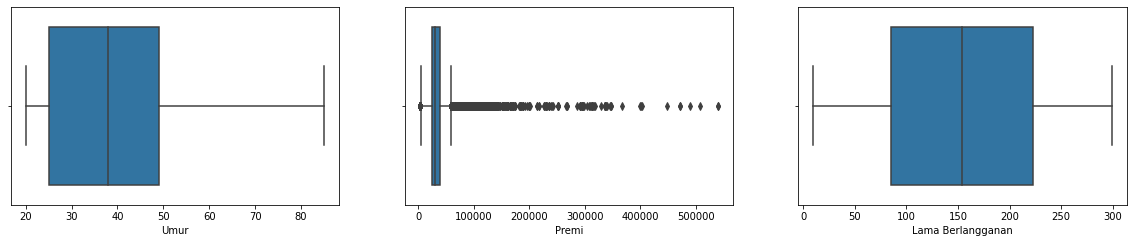

In [ ]:
# menampilkan boxplot semua kolom numerik untuk melihat terdapat outliers atau tidak
df_num = df.iloc[:, [0, 1, 7, 9]]
plt.figure(figsize=(20, 8))
for i in range(1, len(df_num.columns)):
  plt.subplot(2, 3, i)
  sns.boxplot(df_num.columns[i], data = df_num)

Terdapat pencilan/outliers pada kolom Premi, maka akan dilakukan handling outliers dengan mengganti nilai outliers menggunakan nilai lower bound dan upper bound.

In [ ]:
# capping outliers kolom df['Premi'] menggunakan nilai lower bound dan upper bound
Q1 = df['Premi'].quantile(0.25)
Q3 = df['Premi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

for i in range(len(df['Premi'])):
   if df['Premi'][i] < lower_bound:
     df['Premi'][i] = lower_bound
   if df['Premi'][i] > upper_bound:
     df['Premi'][i] = upper_bound

Ide dari capping outliers di atas adalah, apabila suatu pencilan lebih kecil dari lower boundnya maka nilai pencilan tersebut akan direplace menjadi lower bound. Sedangkan apabila pencilan tersebut lebih besar dari upper bound, maka nilai pencilan tersebut akan direplace dengan nilai upper bound.

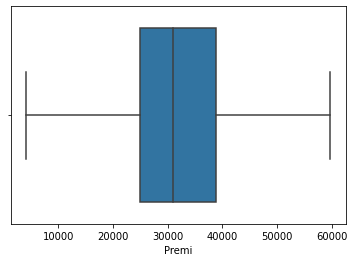

In [ ]:
# menampilkan boxplot kolom df['Premi] setelah dilakukan capping outliers
sns.boxplot(x = 'Premi', data = df)
plt.show()

In [ ]:
# export dataset yang dihasilkan dari tahapan capping outliers ke dalam file csv
df.to_csv('kendaraan_train_clean without outliers.csv', index=False)

**Data Normalization**

In [ ]:
# melakukan mapping dan mengubah kolom bertipe data object menjadi integer
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'Pria': 0 , 'Wanita': 1}).astype(int)
df['Umur Kendaraan'] = df['Umur Kendaraan'].map({'< 1 Tahun': 1 , '> 2 Tahun' : 2, '1-2 Tahun' : 3}).astype(int)
df['Kendaraan Rusak'] = df['Kendaraan Rusak'].map({'Tidak': 0 , 'Pernah': 1}).astype(int)

In [ ]:
# normalisasi menggunakan min max scaler
for col in df.columns:  
  df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

  ''' Saya melakukan eksperimen dengan menggunakan z-score untuk normalisasi data,
  tetapi menurut saya z-score menyebabkan proses eksekusi perhitungan wcss menjadi lebih lama.
  (penjelasan lebih lanjut terdapat di laporan bagian eksperimen)'''
  #df[col] = (df[col] - df[col].mean()) / df[col].std()

df.head()

,Jenis Kelamin,Umur,SIM,Kode Daerah,Sudah Asuransi,Umur Kendaraan,Kendaraan Rusak,Premi,Kanal Penjualan,Lama Berlangganan
0,1.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.430691,0.932099,0.301038
1,0.0,0.430769,1.0,0.750000,0.0,0.5,1.0,0.390647,0.172840,0.512111
2,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.515198,0.981481,0.377163
3,1.0,0.584615,1.0,0.923077,0.0,1.0,0.0,0.000000,0.759259,0.183391
4,0.0,0.461538,1.0,0.673077,0.0,0.5,1.0,0.553356,0.537037,0.636678


In [ ]:
# export dataset yang dihasilkan dari tahapan data normalization ke dalam file csv
df.to_csv('kendaraan_train_standardized.csv', index=False)

# **Pemodelan**

**Heatmap**

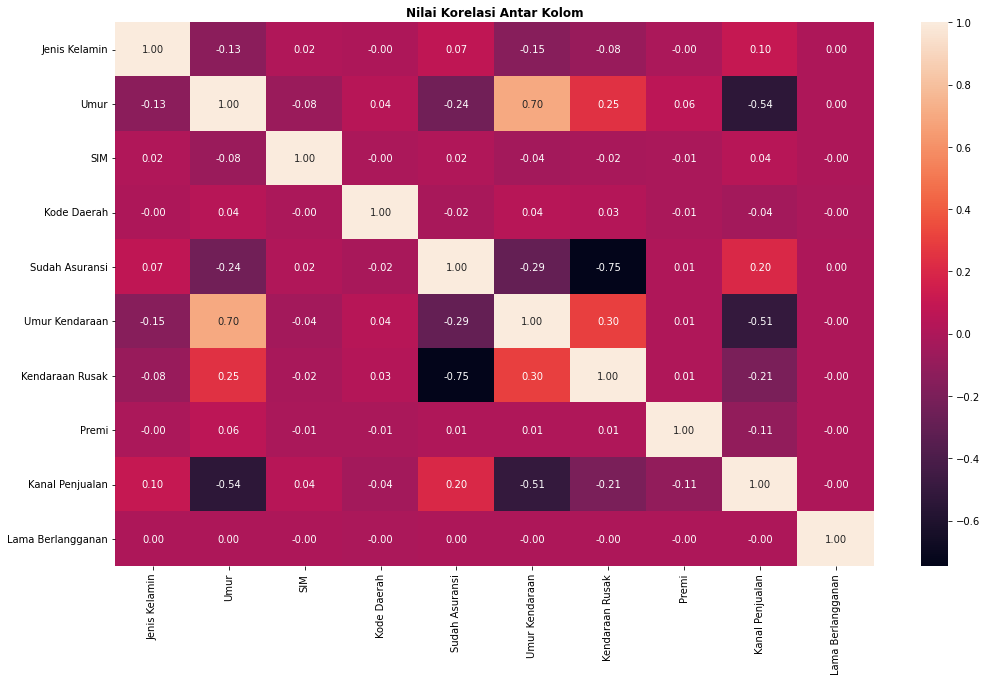

In [ ]:
plt.figure(figsize=(17, 10))
sns.heatmap(data = df.corr(), annot = True, fmt='.2f').set_title('Nilai Korelasi Antar Kolom', weight = 'bold')
plt.show()

**Clustering**

In [ ]:
# memilih 2 atribut atau kolom, kemudian dimasukkan menjadi dataframe baru untuk dilakukan clustering.
x = 'Umur'
y = 'Kanal Penjualan'

''' Saya melakukan eksperimen dengan menggunakan data x = 'Umur' dan y = 'Umur Kendaraan',
tetapi menurut saya hasil scatter plot kedua data tersebut kurang cocok untuk dilakukan clustering
(penjelasan lebih lanjut terdapat di laporan bagian eksperimen)'''
# y = 'Umur Kendaraan'

data = df.loc[:, [x, y]]
data.head()

,Umur,Kanal Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.584615,0.759259
4,0.461538,0.537037


**Step 1** : set jumlah cluster

In [ ]:
# menentukan cluster sebanyak k
k = 2

**Step 2** : menentukan nilai centroid

In [ ]:
''' Function pick_centroid akan mengembalikan nilai centroid secara acak untuk awal iterasi.
Jumlah titik centroidnya akan sesuai dengan jumlah k nya. '''
def pick_centroid(df, x, y, k):
  return {i + 1 : [np.random.choice(df[x]), np.random.choice(df[y])] for i in range(k)}

''' first_cent merupakan variabel yang menyimpan nilai centroid untuk iterasi pertama dengan
nilai k = 2. '''
first_cent = pick_centroid(data, x, y, k)
print(first_cent)

{1: [0.26153846153846155, 0.15432098765432098], 2: [0.7384615384615385, 0.9814814814814815]}


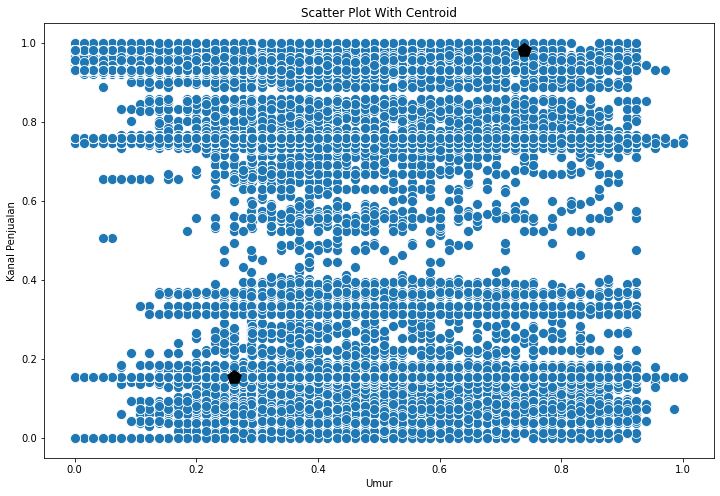

In [ ]:
# visualisasi scatter plot dengan titik awal centroidnya
plt.figure(figsize = (12,8))
sns.scatterplot(data[x], data[y], s = 100)
for i in first_cent:
  plt.scatter(first_cent[i][0], first_cent[i][1], color = 'k', marker = 'p', s = 200)
plt.title('Scatter Plot With Centroid')
plt.show()

**Step 3** : menghitung jarak tiap objek dengan titik-titik centroid

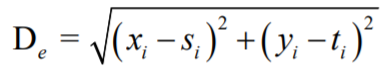

Saya menggunakan metode euclidean untuk menghitung jarak masing-masing objek dengan titik-titik centroid. Dimana (x, y) merupakan titik koordinat dari objek dan (s, t) merupakan titik koordinat centroid.

In [ ]:
''' Function euclidean_distance akan mengembalikan dataframe dengan tambahan kolom yang berisikan jarak
antara objek dengan titik centroidnya. '''
def euclidean_distance(df, x, y, centroid):
  for i in centroid.keys():
    df[str(i)] = np.sqrt((df[x] - centroid[i][0]) ** 2 + (df[y] - centroid[i][1]) ** 2)
  return df 

# menyimpan hasil function euclidean_distance ke data2  
data2 = euclidean_distance(data, x, y, first_cent)
data2.head()

,Umur,Kanal Penjualan,1,2
0,0.153846,0.932099,0.785198,0.586697
1,0.430769,0.172840,0.170241,0.865203
2,0.015385,0.981481,0.863010,0.723077
3,0.584615,0.759259,0.685805,0.270280
4,0.461538,0.537037,0.431824,0.523658


**Step 4** : pengelompokkan objek

In [ ]:
''' Function get_cluster akan mengembalikan nilai integer antara 1, 2, atau 3 berdasarkan jarak centroid
terdekatnya. Misalnya : apabila dibandingkan antara jarak ke centroid 1, centroid 2, dan centroid 3, objek A
memiliki jarak terdekat ke centroid 1 maka, objek A tersebut akan masuk ke cluster 1. '''
def get_cluster(df, centroid):
  # menggunakan idxmin(axis = "columns") untuk mengembalikan nama kolom dengan nilai terkecil di setiap barisnya 
  df['Cluster'] = df.loc[:, [f'{i}' for i in centroid.keys()]].idxmin(axis = "columns").astype('int')
  return df

# menyimpan hasil function get_cluster ke data2  
data2 = get_cluster(data2, first_cent)
data2.head()

,Umur,Kanal Penjualan,1,2,Cluster
0,0.153846,0.932099,0.785198,0.586697,2
1,0.430769,0.172840,0.170241,0.865203,1
2,0.015385,0.981481,0.863010,0.723077,2
3,0.584615,0.759259,0.685805,0.270280,2
4,0.461538,0.537037,0.431824,0.523658,1


**Step 5** : kembali menentukan nilai centroid serta melakukan iterasi hingga nilai centroid sudah tetap dan anggota cluster tidak berpindah-pindah ke cluster lain.

In [ ]:
''' Function new_centroid akan mengembalikan titik centroid berdasarkan rata-rata pada masing-masing cluster.
Perbedaan function ini dengan pick_centroid ialah, nilai centroid pada function new_centroid tidak di assign 
secara acak melainkan diisi dengan rata-ratanya. '''
def new_centroid(df, centroid):
  for i in centroid.keys():
    centroid[i][0] = np.mean(df[df['Cluster'] == i][x])
    centroid[i][1] = np.mean(df[df['Cluster'] == i][y])
  return centroid

**Main Program**

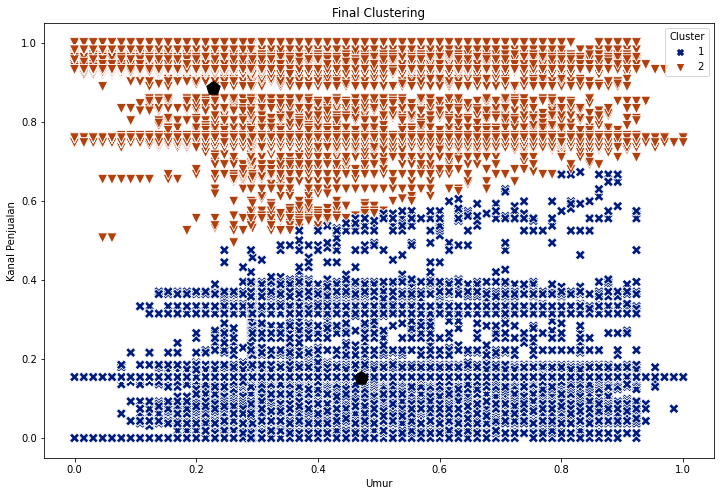

In [ ]:
def KMeans(df, x, y, k):
  # memanggil semua fungsi yang telah dibangun sebelumnya
  new_cent = pick_centroid(df, x, y, k)
  data2 = df.loc[:, [x, y]]
  data2 = euclidean_distance(data2, x, y, new_cent)
  data2 = get_cluster(data2, new_cent)
  new_cent = new_centroid(data2, new_cent)

  # melakukan iterasi hingga nilai centroid yang baru bernilai sama dengan centroid yang lama
  while (True):
    '''Di dalam perulangan ini, langkah-langkah algoritma 
    K-Means clustering akan kembali dilakukan '''
    old_cent = copy.deepcopy(new_cent)
    data2 = euclidean_distance(data2, x, y, new_cent)
    data2 = get_cluster(data2, new_cent)
    new_cent = new_centroid(data2, new_cent)

    '''Perulangan akan berhenti apabila nilai centroid yang 
    terambil bernilai sama dengan centroid sebelumnya'''
    if (old_cent == new_cent):
      break
  return (data2, new_cent)

# visualisasi final clustering
data2, new_cent = KMeans(data, x, y, k)
plt.figure(figsize = (12,8))
markers = {1 : 'X', 2 : 'v'}
sns.scatterplot(data2[x], data2[y], data = data2, hue = 'Cluster', style = 'Cluster', palette = 'dark', markers = markers, s = 100)
for i in new_cent:
  plt.scatter(*new_cent[i], color = 'k', marker = 'p', s = 200)
plt.title('Final Clustering')
plt.show()

Berikut adalah hasil visualisasi setelah dilakukan proses clustering menggunakan algoritma K-Means dengan data “Umur” dan “Kanal Penjualan”. Kelompok data yang berwarna biru merupakan cluster 1 dan kelompok data yang berwarna oranye merupakan cluster 2. Titik yang berwarna hitam merupakan centroid final untuk masing-masing cluster. 

# **Evaluasi**

Untuk mengetahui berapa nilai k yang paling optimum dan cocok diimplementasikan kedalam dataset, kita bisa menggunakan bantuan elbow method. Sebelum membangun grafiknya, terlebih dahulu menghitung sum of square error dari masing-masing nilai clusternya.

In [ ]:
''' function sum_squared_error akan menghitung jumlah jarak kuadrat dari setiap
objek ke titik centroidnya. '''
def sum_squared_error(df, centroid):
  total = 0
  for i in range(len(centroid)):
    val = i + 1
    k = df[(df['Cluster'] == val)][f'{val}'] ** 2
    total = total + k.sum()
  return total

print("\n-------------------------------------------------")
print('|\t\t   Nilai WCSS\t\t\t|')
print("-------------------------------------------------")
wcss_list = []
for i in range(10): 
  data2, new_cent = KMeans(data, x, y, i+1)
  # memanggil function sum_squared_error kemudian menyimpan hasilnya di variabel wcss
  wcss = sum_squared_error(data2, new_cent)
  wcss_list.append(wcss)
  print(f'{i+1}. Nilai k :', i + 1, '|  Nilai WCSS :', wcss_list[i])


-------------------------------------------------
|		   Nilai WCSS			|
-------------------------------------------------
1. Nilai k : 1 |  Nilai WCSS : 46714.01145035494
2. Nilai k : 2 |  Nilai WCSS : 14066.957838303817
3. Nilai k : 3 |  Nilai WCSS : 6740.636478462173
4. Nilai k : 4 |  Nilai WCSS : 6740.636478462174
5. Nilai k : 5 |  Nilai WCSS : 4439.299536240467
6. Nilai k : 6 |  Nilai WCSS : 2547.0056684411884
7. Nilai k : 7 |  Nilai WCSS : 2214.1499852653387
8. Nilai k : 8 |  Nilai WCSS : 3876.223966548721
9. Nilai k : 9 |  Nilai WCSS : 1898.9328025452194
10. Nilai k : 10 |  Nilai WCSS : 1812.05423642594


Hasil diatas menunjukkan bahwa semakin besar jumlah cluster maka nilai WCSS nya akan semakin kecil.

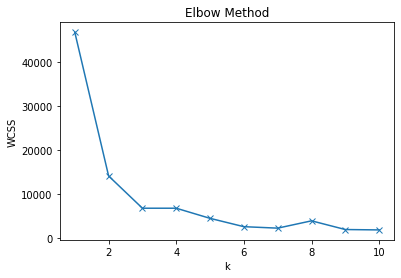

In [ ]:
# visualisasi elbow method
plt.plot(range(1, 11), wcss_list, '-x')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

Dari hasil output di atas dapat diketahui bahwa pemilihan jumlah cluster k = 2 bukanlah pilihan yang optimal, karena nilai wcssnya masih terus menurun secara signifikan. Ketika nilai k = 3, perubahan nilai wcssnya perlahan mulai melandai. Oleh karena itu, akan dilakukan visualisasi clustering dengan nilai k = 3.

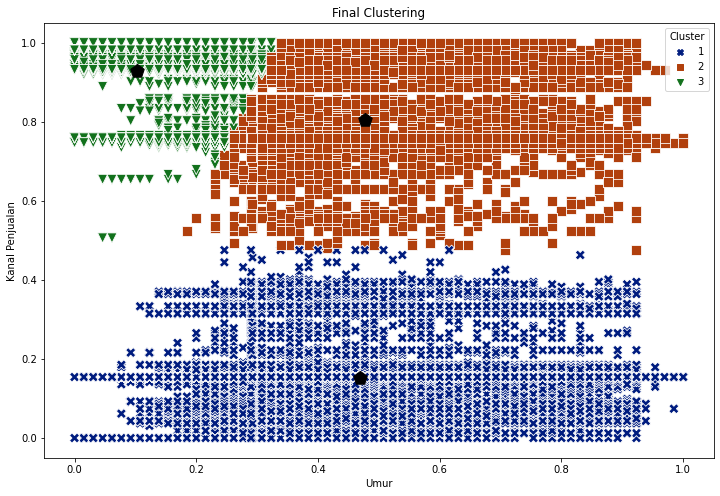

In [ ]:
# visualisasi final clustering
data2, new_cent = KMeans(data, x, y, k = 3)
plt.figure(figsize = (12,8))
markers = {1: 'X', 2: 's', 3 : 'v'}
sns.scatterplot(data2[x], data2[y], data = data2, hue = 'Cluster', 
                style = 'Cluster', palette = 'dark', markers = markers, s = 100)
for i in new_cent:
  plt.scatter(*new_cent[i], color = 'k', marker = 'p', s = 200)
plt.title('Final Clustering')
plt.show()

Visualisasi diatas merupakan clustering dengan k = 3 pada kolom "Umur" dan "Kanal Penjualan". Kelompok data yang berwarna biru merupakan cluster 1, kelompok data yang berwarna oranye merupakan cluster 2, dan kelompok data yang berwarna hijau merupakan cluster 3. Titik yang berwarna hitam merupakan centroid final untuk masing-masing cluster.

# **Eksperimen**

In [ ]:
# Saya melakukan eksperimen dengan menggunakan nilai k = 4
# penjelasan lebih lanjut terdapat di laporan bagian eksperimen)

# eksperimen k = 4
# data2, new_cent = KMeans(data, x, y, k = 4)
# plt.figure(figsize = (12,8))
# markers = {1: 'X', 2: 's', 3 : 'v', 4 : 'p'}
# sns.scatterplot(data2[x], data2[y], data = data2, hue = 'Cluster', 
#                 style = 'Cluster', palette = 'dark', markers = markers, s = 100)
# for i in new_cent:
#   plt.scatter(*new_cent[i], color = 'k', marker = 'p', s = 200)
# plt.title('Final Clustering')
# plt.show()